<img src='https://www.unifor.br/o/unifor-theme/images/unifor-logo-horizontal.svg' width="250px">

# Séries Temporais - Prática 2

Prof. Túlio Ribeiro<br>
Laboratório de Ciência de Dados e Inteligência Artificial (LCDIA)<br>

MBA em Ciência de Dados<br>
Universidade de Fortaleza

# **1. Análise do dataset 'precipitacao.csv'**

## 1.1 Apresente graficamente o comportamento da precipitação como função do tempo.

## 1.2 Faça a decomposição da série em 3 partes: 'Tendência', 'Sazonalidade' e 'Resíduo'. Para cada componente, faça os seguintes itens:
- Apresente graficamente o comportamento da 'Tendência', 'Sazonalidade' e 'Resíduo' como função do tempo.
- Teste a estacionaridade para cada componente.
- Teste a normalidade para cada componente.
    
## 1.3 Faça a transformação cúbica e logaritmica. Para cada transformação, faça uma diferenciação. Em quais operações é possível obter uma evolução estacionária e/ou normal?


### Observações:
- Para cada item, crie novas células para efetuar seus códigos.
- Nomear variáveis de acordo com o contexto da questão.
- Caso necessário, utilize novas caixas de textos para deixar comentários.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dados de Precipitação

In [2]:
!gdown 1Wa__6Zk9kc7Ycr5OP9MWnK-4tX9ik3ed

Downloading...
From: https://drive.google.com/uc?id=1Wa__6Zk9kc7Ycr5OP9MWnK-4tX9ik3ed
To: /content/precipitacao.csv
100% 2.67k/2.67k [00:00<00:00, 11.7MB/s]


In [3]:
df = pd.read_csv('precipitacao.csv')

In [4]:
df.head()

,Ano,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
0,1985,184.9,242.9,230.0,59.0,126.2,14.6,4.0,21.80,126.1,71.1,111.3,155.2
1,1986,199.6,221.0,218.7,106.5,113.1,3.9,30.3,27.85,34.5,60.7,242.5,389.9
2,1987,525.8,249.3,161.3,98.1,293.8,183.9,11.8,30.90,80.2,84.8,72.7,152.1
3,1988,268.7,224.4,189.2,175.1,224.9,58.6,1.3,0.20,28.4,173.9,100.2,289.8
4,1989,312.9,344.3,288.2,66.3,21.7,52.5,150.1,32.90,52.1,80.1,88.0,236.7


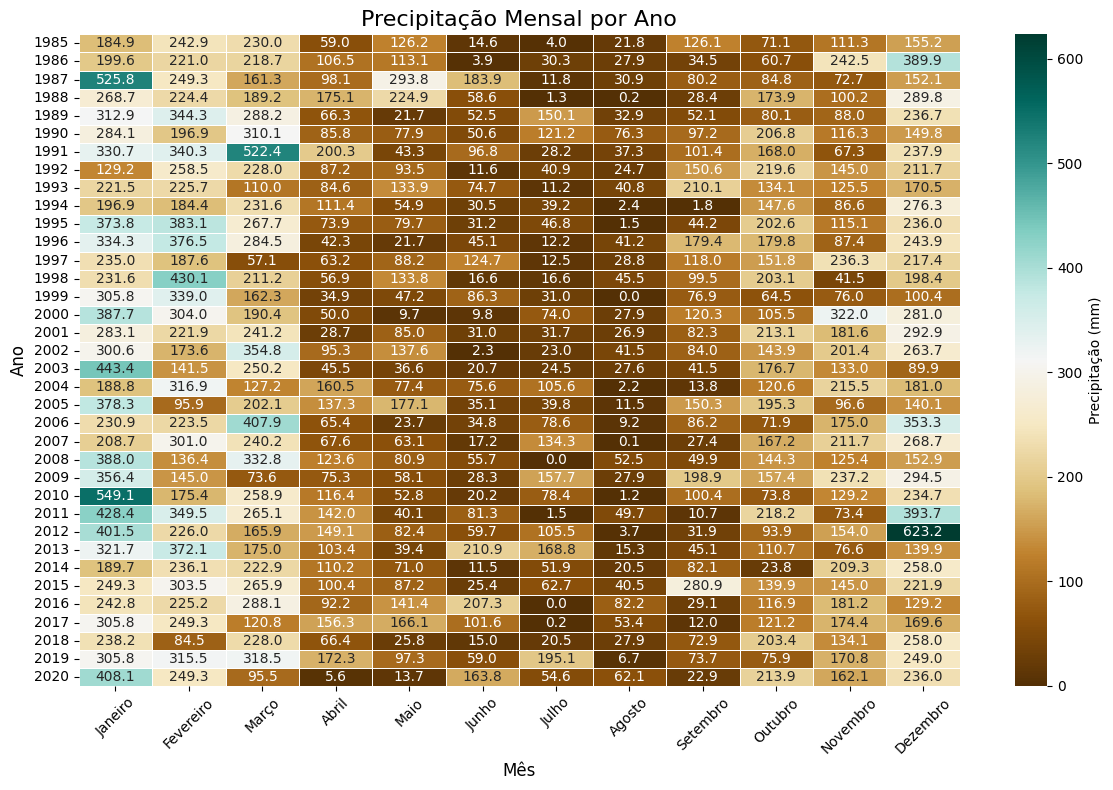

In [5]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.set_index("Ano"), cmap="BrBG", annot=True, fmt=".1f", linewidths=0.5, cbar_kws={"label": "Precipitação (mm)"})

plt.title("Precipitação Mensal por Ano", fontsize=16)
plt.xlabel("Mês", fontsize=12)
plt.ylabel("Ano", fontsize=12)

plt.xticks(rotation=45, ha="center")
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

In [6]:
df.drop('Ano', axis=1, inplace=True)

series = pd.Series(df.values.flatten(), index=pd.date_range('1/1/1985', periods=432, freq='ME'), name='precipitacao')

In [7]:
series

,precipitacao
1985-01-31,184.90
1985-02-28,242.90
1985-03-31,230.00
1985-04-30,59.00
1985-05-31,126.20
...,...
2020-08-31,62.10
2020-09-30,22.90
2020-10-31,213.90
2020-11-30,162.10


### Funções

In [8]:
import scipy.stats as stats
import statsmodels.tsa.stattools

In [9]:
# Estacionariedade

def teste_estacionaridade(x):
    kpss = statsmodels.tsa.stattools.kpss(x)
    valor_critico = kpss[3]['5%']
    teste = kpss[0]
    if teste <= valor_critico:
        print('A série é estacionária')
    else:
        print('A série NÃO é estacionária')


In [10]:
# Normalidade

def teste_normalidade(x):
    e, p = stats.shapiro(x)
    if p < 0.05:
        print('A distribuição NÃO é normal')
    else:
        print('A distribuição é normal')

## 1.1 Apresente graficamente o comportamento da precipitação como função do tempo.

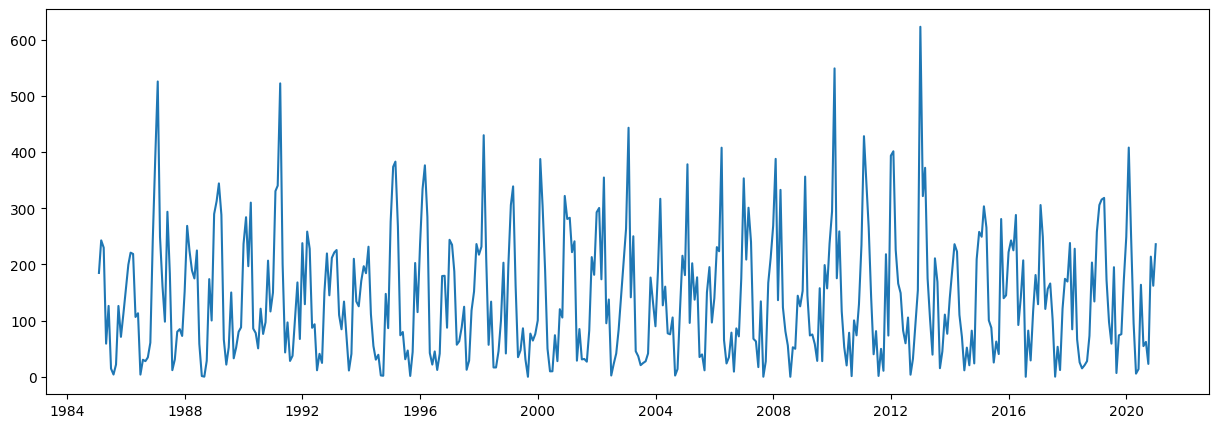

In [11]:
plt.figure(figsize=(15, 5))
plt.plot(series)
plt.show()

## 1.2 Faça a decomposição da série em 3 partes: 'Tendência', 'Sazonalidade' e 'Resíduo'

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 1500x500 with 0 Axes>

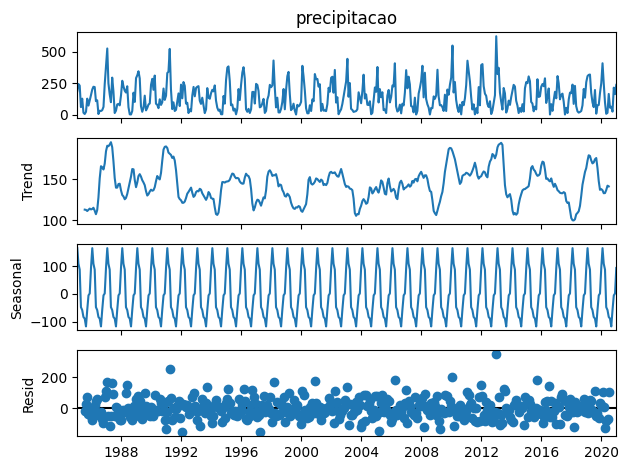

In [13]:
# Plotando Tendência, Sazonalidade e Resíduo da série decomposta em função do tempo

decomposicao = seasonal_decompose(series, period=12)

plt.figure(figsize=(15,5))
decomposicao.plot()
plt.show()

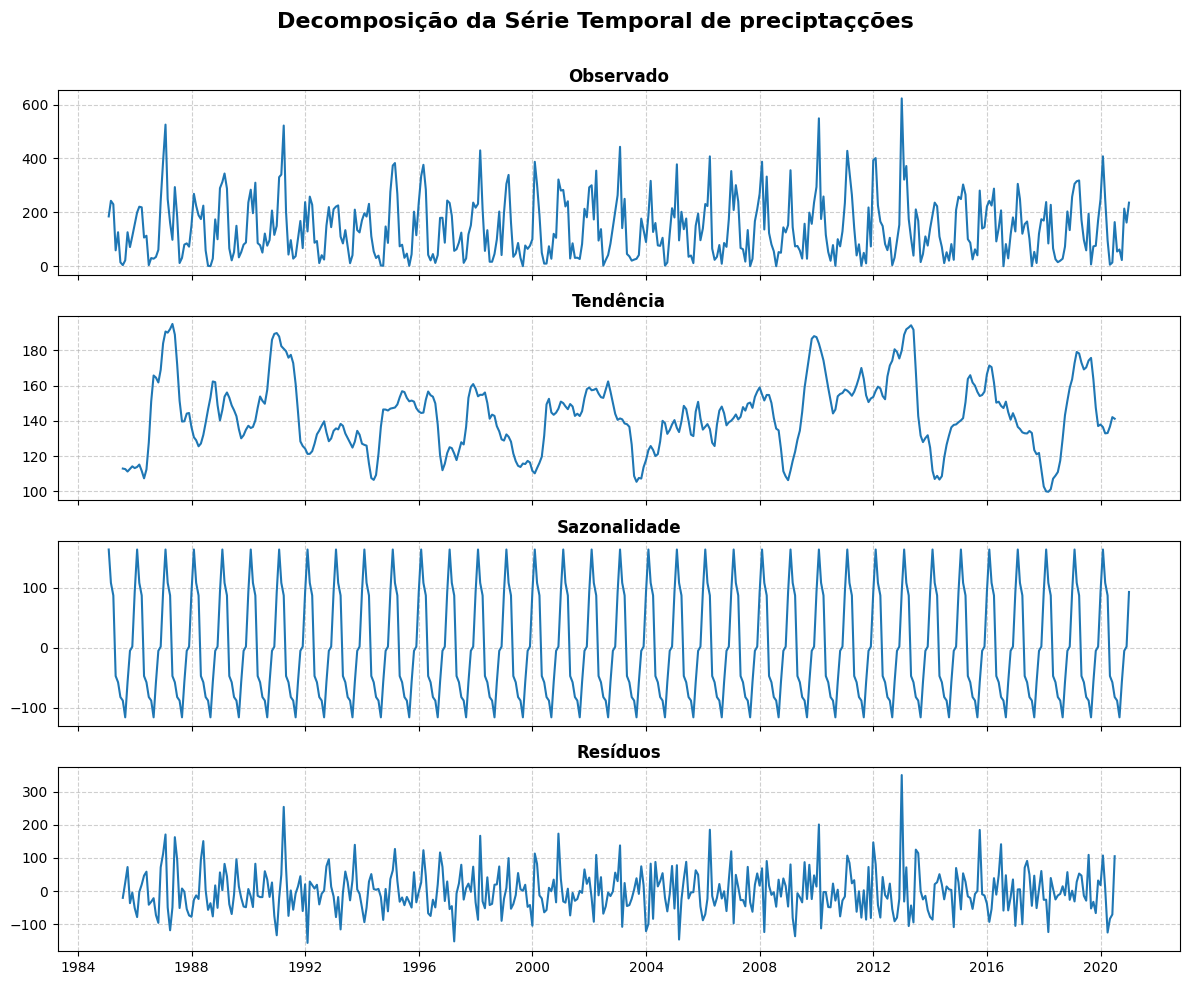

In [14]:
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# Títulos e componentes
components = ['Observado', 'Tendência', 'Sazonalidade', 'Resíduos']
plots = [decomposicao.observed, decomposicao.trend, decomposicao.seasonal, decomposicao.resid]

for ax, comp, title in zip(axes, plots, components):
    ax.plot(comp, linewidth=1.5)
    ax.set_title(title, fontsize=12, weight='bold')
    ax.grid(True, linestyle='--', alpha=0.6)

fig.suptitle('Decomposição da Série Temporal de preciptaçções', fontsize=16, weight='bold')
fig.tight_layout()
fig.subplots_adjust(top=0.9)
plt.show()

## Testes para cada decomposição


### Tendência

In [15]:
tend = decomposicao.trend
tend.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 432 entries, 1985-01-31 to 2020-12-31
Freq: ME
Series name: trend
Non-Null Count  Dtype  
--------------  -----  
420 non-null    float64
dtypes: float64(1)
memory usage: 6.8 KB


In [16]:
# Excluindo valores nulos

tend = tend.dropna()
tend.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 420 entries, 1985-07-31 to 2020-06-30
Freq: ME
Series name: trend
Non-Null Count  Dtype  
--------------  -----  
420 non-null    float64
dtypes: float64(1)
memory usage: 6.6 KB


In [17]:
# Teste de normalidade

teste_normalidade(tend)

A distribuição NÃO é normal


In [18]:
# Teste de Estacicionaridade

teste_estacionaridade(tend)

A série é estacionária


<ipython-input-9-5cbc5d7b2385>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss = statsmodels.tsa.stattools.kpss(x)


###  Sazonalidade

In [19]:
saz = decomposicao.seasonal
saz.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 432 entries, 1985-01-31 to 2020-12-31
Freq: ME
Series name: seasonal
Non-Null Count  Dtype  
--------------  -----  
432 non-null    float64
dtypes: float64(1)
memory usage: 6.8 KB


In [20]:
# Teste de Normalidade
teste_normalidade(saz)

A distribuição NÃO é normal


In [21]:
# Teste de  Estacionaridade
teste_estacionaridade(saz)

A série é estacionária


<ipython-input-9-5cbc5d7b2385>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss = statsmodels.tsa.stattools.kpss(x)


### Resíduos

In [22]:
res = decomposicao.resid
res.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 432 entries, 1985-01-31 to 2020-12-31
Freq: ME
Series name: resid
Non-Null Count  Dtype  
--------------  -----  
420 non-null    float64
dtypes: float64(1)
memory usage: 6.8 KB


In [23]:
res = res.dropna()
res.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 420 entries, 1985-07-31 to 2020-06-30
Freq: ME
Series name: resid
Non-Null Count  Dtype  
--------------  -----  
420 non-null    float64
dtypes: float64(1)
memory usage: 6.6 KB


In [24]:
# Teste de Normalidade
teste_normalidade(res)

A distribuição NÃO é normal


In [25]:
# Teste de Estacionaridade
teste_estacionaridade(res)

A série é estacionária


<ipython-input-9-5cbc5d7b2385>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss = statsmodels.tsa.stattools.kpss(x)


# Transormações



In [26]:
# Deixando resultado dos testes da série original

teste_estacionaridade(series)
teste_normalidade(series)

A série é estacionária
A distribuição NÃO é normal


<ipython-input-9-5cbc5d7b2385>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss = statsmodels.tsa.stattools.kpss(x)


## Logaritmica

In [27]:
serie_log = np.log(series)
serie_log.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 432 entries, 1985-01-31 to 2020-12-31
Freq: ME
Series name: precipitacao
Non-Null Count  Dtype  
--------------  -----  
432 non-null    float64
dtypes: float64(1)
memory usage: 6.8 KB


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [28]:
serie_log

,precipitacao
1985-01-31,5.219815
1985-02-28,5.492650
1985-03-31,5.438079
1985-04-30,4.077537
1985-05-31,4.837868
...,...
2020-08-31,4.128746
2020-09-30,3.131137
2020-10-31,5.365509
2020-11-30,5.088213


In [29]:
# Testes da série logaritimica

#teste_estacionaridade(serie_log)
teste_normalidade(serie_log)

A distribuição é normal


In [37]:
serie_log = serie_log[~np.isinf(serie_log)]

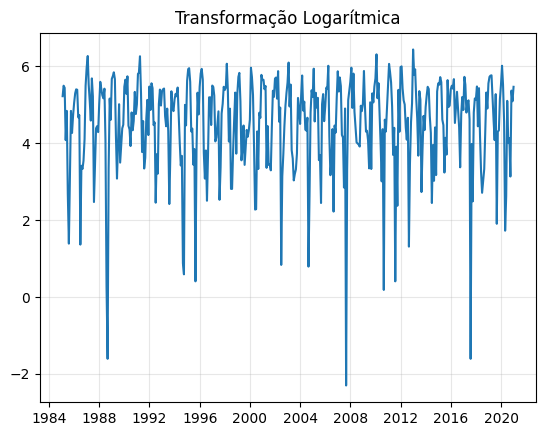

In [39]:
plt.figure()
plt.title('Transformação Logarítmica')
plt.plot(serie_log)
plt.grid(alpha=0.3)

In [40]:
teste_estacionaridade(serie_log)
teste_normalidade(serie_log)

A série é estacionária
A distribuição NÃO é normal


<ipython-input-9-5cbc5d7b2385>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss = statsmodels.tsa.stattools.kpss(x)


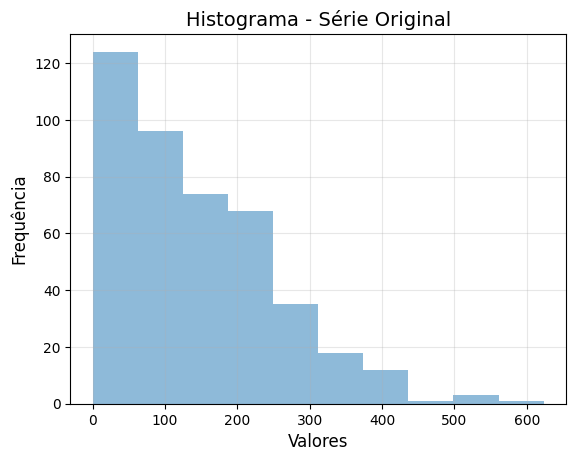

In [31]:
# Histograma da série original

plt.figure()
plt.hist(series, bins=10, alpha=0.5)

plt.title('Histograma - Série Original', fontsize=14)
plt.xlabel('Valores', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

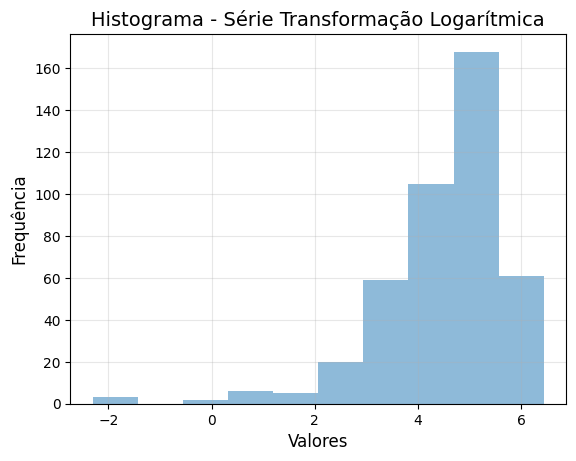

In [41]:
# Histograma da Série Logaritmica
plt.figure()
plt.hist(serie_log, bins=10, alpha=0.5)

plt.title('Histograma - Série Transformação Logarítmica', fontsize=14)
plt.xlabel('Valores', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

## Cúbica

In [42]:
serie_cubica = series**(1/3)
serie_cubica

,precipitacao
1985-01-31,5.696992
1985-02-28,6.239395
1985-03-31,6.126926
1985-04-30,3.892996
1985-05-31,5.015949
...,...
2020-08-31,3.960018
2020-09-30,2.839739
2020-10-31,5.980492
2020-11-30,5.452483


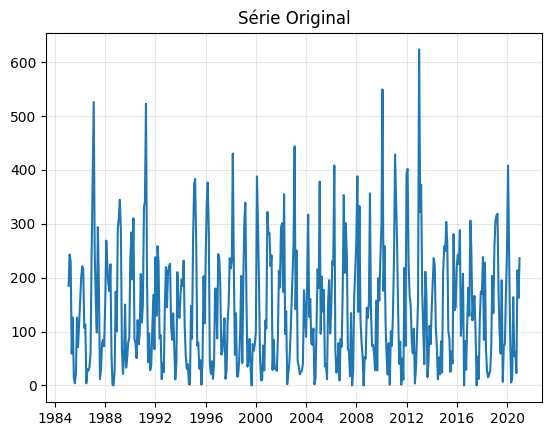

In [43]:
# Plot Série Original
plt.figure()
plt.title('Série Original')
plt.plot(series)
plt.grid(alpha=0.3)

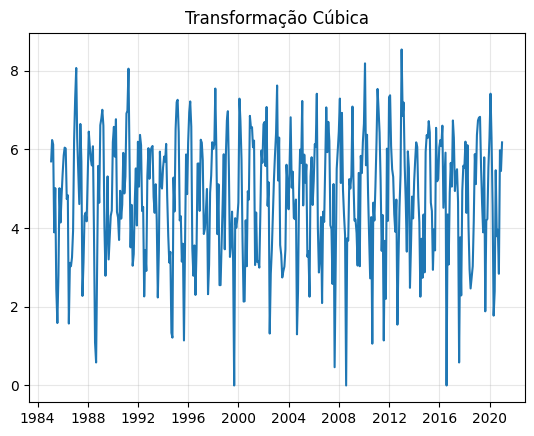

In [44]:
# Plot série Cúbica

plt.figure()
plt.title('Transformação Cúbica')
plt.plot(serie_cubica)
plt.grid(alpha=0.3)

In [45]:
# Testes Série Cúbica

teste_normalidade(serie_cubica)
teste_estacionaridade(serie_cubica)

A distribuição NÃO é normal
A série é estacionária


<ipython-input-9-5cbc5d7b2385>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss = statsmodels.tsa.stattools.kpss(x)


#   Diferenciação

## Original

In [46]:
ser_diff = series - series.shift(1)
ser_diff.head()

,precipitacao
1985-01-31,NaN
1985-02-28,58.0
1985-03-31,-12.9
1985-04-30,-171.0
1985-05-31,67.2


In [47]:
# Juntar a série original, a ser subtraída e o resultado

pd.concat([series, series.shift(1), ser_diff], axis=1)

,precipitacao,precipitacao,precipitacao
1985-01-31,184.90,NaN,NaN
1985-02-28,242.90,184.9,58.00
1985-03-31,230.00,242.9,-12.90
1985-04-30,59.00,230.0,-171.00
1985-05-31,126.20,59.0,67.20
...,...,...,...
2020-08-31,62.10,54.6,7.50
2020-09-30,22.90,62.1,-39.20
2020-10-31,213.90,22.9,191.00
2020-11-30,162.10,213.9,-51.80


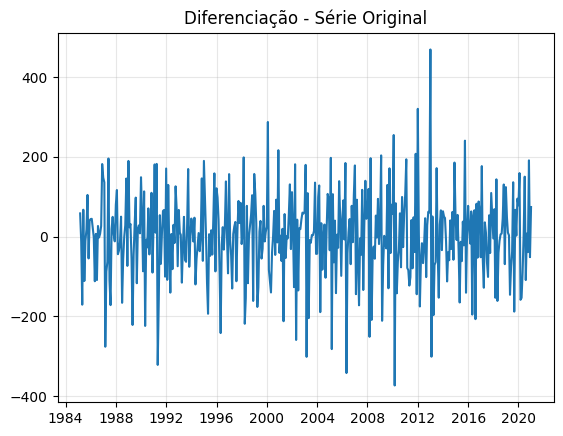

In [48]:
# Plot da Diferenciação da série original
plt.figure()
plt.title('Diferenciação - Série Original')
plt.plot(ser_diff)
plt.grid(alpha=0.3)

In [49]:
# Testes de Normalidade e Estacionaridade
ser_diff = ser_diff.dropna()

teste_normalidade(ser_diff)
teste_estacionaridade(ser_diff)

A distribuição NÃO é normal
A série é estacionária


<ipython-input-9-5cbc5d7b2385>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss = statsmodels.tsa.stattools.kpss(x)


## Série Cúbica

In [50]:
ser_cubica_diff = serie_cubica - serie_cubica.shift(1)
ser_cubica_diff.head(10)

,precipitacao
1985-01-31,NaN
1985-02-28,0.542403
1985-03-31,-0.112470
1985-04-30,-2.233929
1985-05-31,1.122953
1985-06-30,-2.571857
1985-07-31,-0.856691
1985-08-31,1.206121
1985-09-30,2.221101
1985-10-31,-0.871863


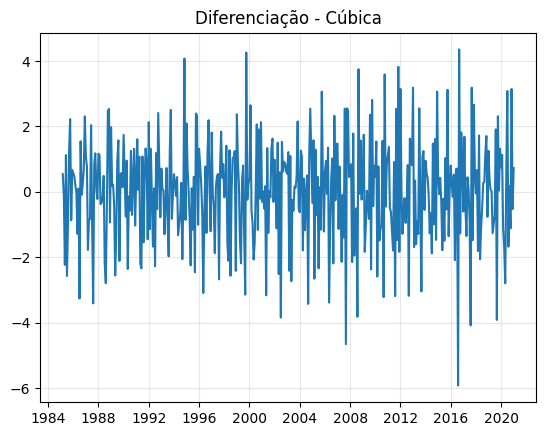

In [51]:
# Plot

plt.figure()
plt.title('Diferenciação - Cúbica')
plt.plot(ser_cubica_diff)
plt.grid(alpha=0.3)

In [52]:
# Testes de Normalidade e Estacionaridade
ser_cubica_diff = ser_cubica_diff.dropna()

In [53]:
teste_normalidade(ser_cubica_diff)
teste_estacionaridade(ser_cubica_diff)

A distribuição é normal
A série é estacionária


<ipython-input-9-5cbc5d7b2385>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss = statsmodels.tsa.stattools.kpss(x)


## Logaritmica

In [54]:
ser_log_diff = serie_log - serie_log.shift(1)
ser_log_diff

,precipitacao
1985-01-31,NaN
1985-02-28,0.272835
1985-03-31,-0.054571
1985-04-30,-1.360542
1985-05-31,0.760331
...,...
2020-08-31,0.128712
2020-09-30,-0.997609
2020-10-31,2.234372
2020-11-30,-0.277295


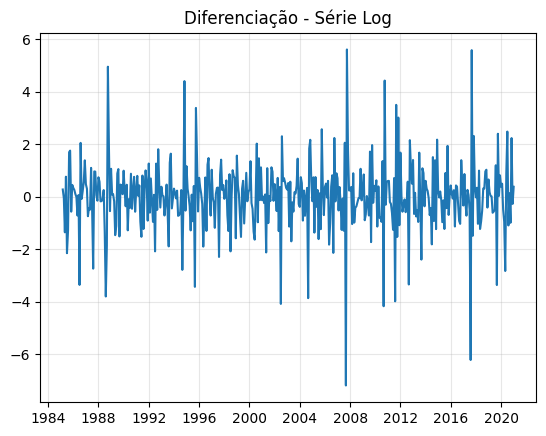

In [55]:
# plot
plt.figure()
plt.title('Diferenciação - Série Log')
plt.plot(ser_log_diff)
plt.grid(alpha=0.3)

In [61]:
np.isinf(ser_log_diff)

TypeError: ufunc 'invert' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

## Comparações

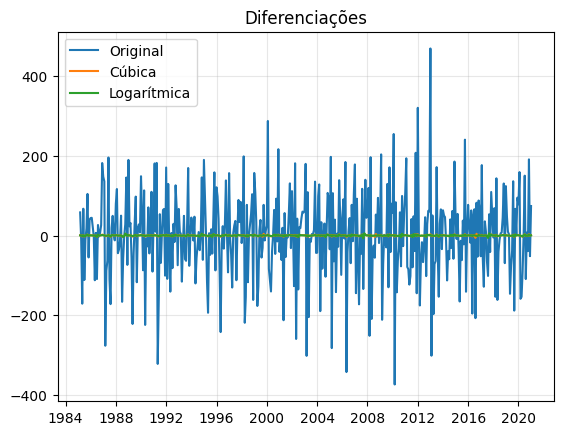

In [67]:
plt.figure()
plt.title('Diferenciações')
plt.plot(ser_diff, label='Original')
plt.plot(ser_cubica_diff, label='Cúbica')
plt.plot(ser_log_diff, label='Logarítmica')
#plt.yscale('log')
plt.legend()
plt.grid(alpha=0.3)

Diferenciações:

- Série resultante Cúbica é normal e estacionária
- Série resultante Logaritmica é normal e estacionária
- Série restultante Original **Não** é normal e estacionária